<a href="https://colab.research.google.com/github/srikar0313/ML-projects/blob/main/Budget%2CCheck%26Balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1.Add a new transcation
2.View the Transaction and summary within the range
3.Exit
Enter the choice (1-3):2
Enter the start_date (dd-mm-yyyy):01-01-2000
Enter the end_date (dd-mm-yyyy):01-01-2025
Transactions from 01-01-2000 to 01-01-2025
      Date  Amount Category Description
17-07-2024    50.0   Income         ssf
17-07-2024   542.0   Income          sf
17-07-2024   412.0  Expense         sff

 SUMMARY

Total Income:592.00Rs
Total expense:412.00Rs
Savings=180.00Rs
do u want to see graph?(y/n)y


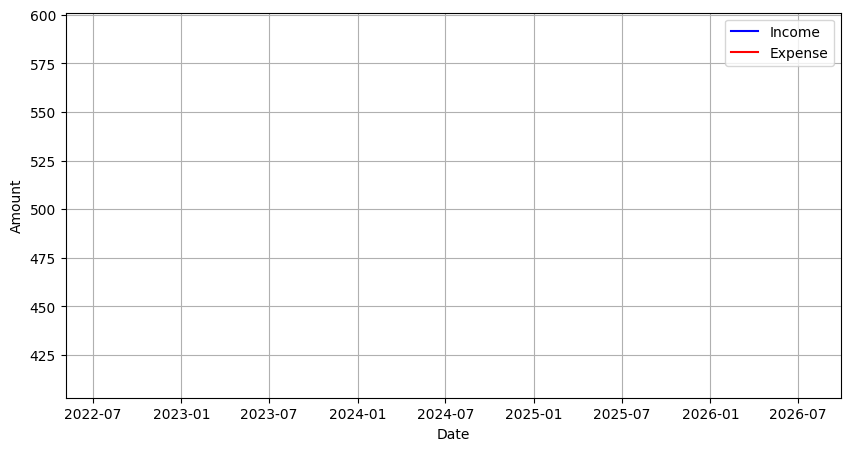


1.Add a new transcation
2.View the Transaction and summary within the range
3.Exit


KeyboardInterrupt: Interrupted by user

In [6]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime

date_format="%d-%m-%Y"
CATEGORIES={"I": "Income","E": "Expense"}

def get_date(prompt,allow_default=False):
    date_str=input(prompt)
    if allow_default and not date_str:
        return datetime.today().strftime(date_format)

    try:
        valid_date=datetime.strptime(date_str,date_format)
        return valid_date.strftime(date_format)
    except ValueError:
        print("invalid date format,format should be in dd-mm-yyyy format")
        return get_date(prompt,allow_default)

def get_amount():
    try:
        amount=float(input("Enter the amount: "))
        if amount<=0:
            raise ValueError("Amount dhould not be in negative.")
        return amount
    except ValueError as e:
        print(e)
        return get_amount()

def get_category():
    category=input("Enter the category('I' for income or 'E' for expense): ").upper()
    if category in CATEGORIES:
        return CATEGORIES[category]
    print("Invalid entry!")
    return get_category()

def get_discription():
    return input("Enter anything(optional)")

class CSV:
    CSV_FILE="finance_data.csv"
    COLUMNS=["Date", "Amount", "Category", "Discription"]
    FORMAT="%d-%m-%Y"

    @classmethod
    def initalize_csv(cls):
        try:
            pd.read_csv(cls.CSV_FILE)
        except FileNotFoundError:
            df=pd.DataFrame(columns=cls.COLUMNS)#dataframe is aobject which is used to access the rows and columns in the file
            df.to_csv(cls.CSV_FILE,index=False)

    @classmethod
    def add_entry(cls,date,amount,category,discription):
        new_entry={
            "Date":date,
            "Amount":amount,
            "Category":category,
            "Discription":discription
        }
        with open(cls.CSV_FILE, "a", newline="") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=cls.COLUMNS)
            writer.writerow(new_entry)
        print("Entry added successfully")

    @classmethod
    def get_transactions(cls,start_date,end_date):
        df=pd.read_csv(cls.CSV_FILE)
        df["Date"]=pd.to_datetime(df["Date"],format=CSV.FORMAT)
        start_date=datetime.strptime(start_date,CSV.FORMAT)
        end_date=datetime.strptime(end_date,CSV.FORMAT)

        mask=(df["Date"] >= start_date)& (df["Date"] <= end_date)
        filtered_df=df.loc[mask]

        if filtered_df.empty:
            print("No transactions found in given date range")
            return None
        else:
            print(f"Transactions from {start_date.strftime(CSV.FORMAT)} to {end_date.strftime(CSV.FORMAT)}")
            print(filtered_df.to_string(index=False,formatters={"Date": lambda x: x.strftime(CSV.FORMAT)}))

            total_income=filtered_df[filtered_df["Category"]== "Income"]["Amount"].sum()
            total_expense=filtered_df[filtered_df["Category"]== "Expense"]["Amount"].sum()
            print("\n SUMMARY\n")
            print(f"Total Income:{total_income:.2f}Rs")
            print(f"Total expense:{total_expense:.2f}Rs")
            print(f"Savings={(total_income-total_expense):.2f}Rs")
            return filtered_df


def add():
    CSV.initalize_csv()
    date=get_date("Enter the date of transaction(dd-mm-yyyy) or enter todays date: ",allow_default=True)
    amount=get_amount()
    category=get_category()
    discription=get_discription()
    CSV.add_entry(date,amount,category,discription)

def plot_transactions(df):
    df.set_index("Date",inplace=True)
    income_df=df[df["Category"]=="Income"].resample("D").sum().reindex(df.index,fill_value=0)
    expense_df=df[df["Category"]=="Expense"].resample("D").sum().reindex(df.index,fill_value=0)
    plt.figure(figsize=(10,5))
    plt.plot(income_df.index,income_df["Amount"],label="Income",color="b")
    plt.plot(expense_df.index,expense_df["Amount"],label="Expense",color="r")
    plt.xlabel("Date")
    plt.ylabel("Amount")
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    while True:
        print("\n1.Add a new transcation")
        print("2.View the Transaction and summary within the range")
        print("3.Exit")
        choice=input("Enter the choice (1-3):")
        if choice=="1":
            add()
        elif choice=="2":
            start_date=get_date("Enter the start_date (dd-mm-yyyy):")
            end_date=get_date("Enter the end_date (dd-mm-yyyy):")
            df=CSV.get_transactions(start_date,end_date)
            if input("do u want to see graph?(y/n)").upper()=="Y":
                plot_transactions(df)
        elif choice=="3":
            print("Exiting..")
            break
        else:
            print("Invalid choice.Enter 1, 2, or 3")

if __name__=="__main__":
    main()


